In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt

In [5]:
tickers = ['TSLA', 'NVDA', 'SQ', 'AMD']
mydata = pd.DataFrame()
for ticker in tickers:
    mydata[ticker] = wb.DataReader(ticker, data_source = 'yahoo', start = '2016-1-1')['Adj Close']

In [6]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 455 entries, 2016-01-04 to 2017-10-20
Data columns (total 4 columns):
TSLA    455 non-null float64
NVDA    455 non-null float64
SQ      455 non-null float64
AMD     455 non-null float64
dtypes: float64(4)
memory usage: 17.8 KB


In [7]:
mydata.head()

,TSLA,NVDA,SQ,AMD
Date,,,,
2016-01-04,223.410004,31.959547,12.16,2.77
2016-01-05,223.429993,32.472950,11.51,2.75
2016-01-06,219.039993,31.130199,11.52,2.51
2016-01-07,215.649994,29.896048,11.16,2.28
2016-01-08,211.000000,29.254288,11.31,2.14


In [8]:
mydata.tail()

,TSLA,NVDA,SQ,AMD
Date,,,,
2017-10-16,350.600006,197.929993,33.220001,14.26
2017-10-17,355.750000,197.750000,32.689999,14.16
2017-10-18,359.649994,197.580002,32.520000,14.07
2017-10-19,351.809998,197.800003,32.119999,13.95
2017-10-20,345.100006,196.899994,32.500000,13.81


In [9]:
mydata.iloc[0]

TSLA    223.410004
NVDA     31.959547
SQ       12.160000
AMD       2.770000
Name: 2016-01-04 00:00:00, dtype: float64

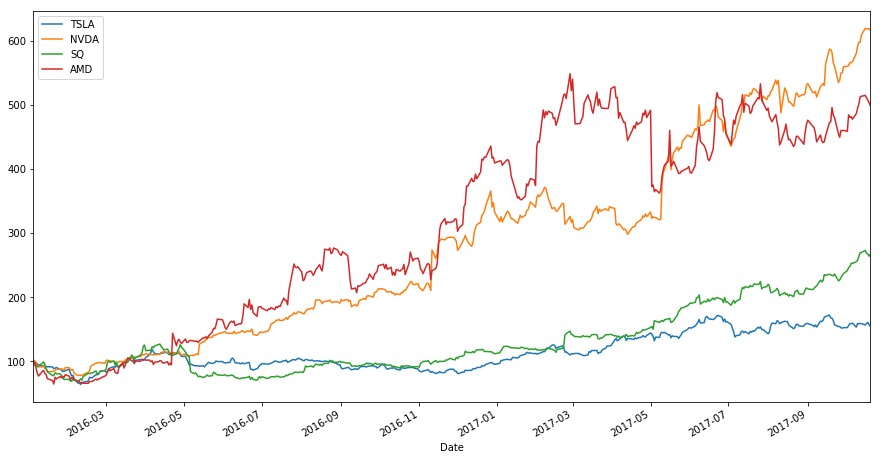

In [15]:
#Normalization to 100
(mydata / mydata.iloc[0] * 100).plot(figsize = (15, 8))
plt.show()

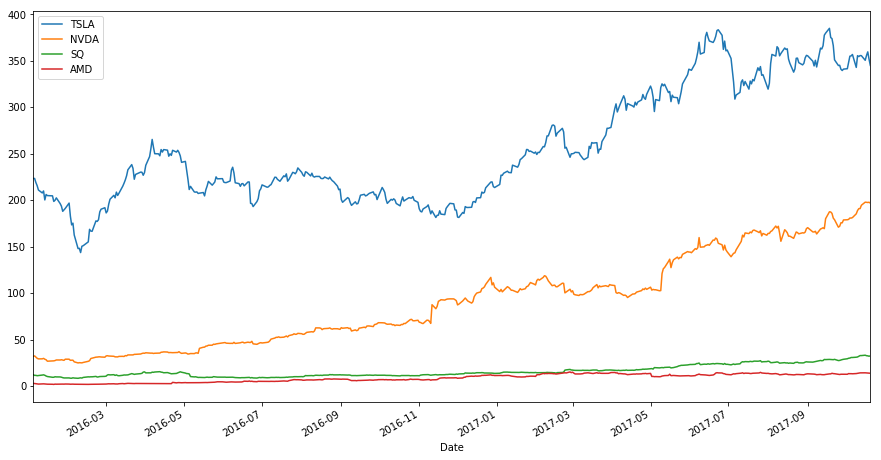

In [16]:
mydata.plot(figsize = (15, 8))
plt.show()

In [17]:
mydata.loc['2017-10-20']

TSLA    345.100006
NVDA    196.899994
SQ       32.500000
AMD      13.810000
Name: 2017-10-20 00:00:00, dtype: float64

In [18]:
#Calculating the Return of a Portfolio of Securities
returns = (mydata / mydata.shift(1)) - 1
returns.head()

,TSLA,NVDA,SQ,AMD
Date,,,,
2016-01-04,NaN,NaN,NaN,NaN
2016-01-05,0.000089,0.016064,-0.053454,-0.007220
2016-01-06,-0.019648,-0.041350,0.000869,-0.087273
2016-01-07,-0.015477,-0.039645,-0.031250,-0.091633
2016-01-08,-0.021563,-0.021466,0.013441,-0.061404


In [19]:
weights = np.array([.25, .25, .25, .25])

In [20]:
np.dot(returns, weights)

array([             nan,  -1.11301351e-02,  -3.68504903e-02,
        -4.45012257e-02,  -2.27479303e-02,   3.17694487e-02,
         1.73821139e-02,  -4.36925023e-02,  -1.91705254e-02,
        -4.81159158e-02,  -2.76269439e-02,  -2.46821767e-02,
         5.87489301e-02,  -3.54388427e-03,   3.48201091e-03,
        -1.39039168e-02,  -1.56467638e-02,  -1.49980946e-02,
         2.83097205e-02,   4.87335240e-04,  -5.43548315e-02,
        -2.60327158e-03,   1.91084293e-02,  -5.46681882e-02,
        -4.77534233e-02,   6.69677796e-03,  -8.66601144e-03,
         5.95221696e-03,   2.08853250e-02,   3.60139777e-02,
         3.52694117e-02,   2.35531344e-02,   2.79353378e-03,
         4.89885157e-02,  -2.12228971e-02,   1.52453130e-02,
         2.29141962e-02,   8.62329096e-03,   1.18258055e-02,
         1.51906016e-02,   4.93262393e-02,   2.85558996e-02,
        -8.04087793e-03,   1.94246390e-02,  -4.09486067e-02,
         1.50238840e-02,  -1.98044735e-02,   3.14244398e-02,
         4.11653148e-02,

In [21]:
annual_returns = returns.mean()*250
annual_returns

TSLA    0.307941
NVDA    1.097633
SQ      0.642662
AMD     1.144937
dtype: float64

In [22]:
np.dot(annual_returns, weights)

0.79829321227288008

In [23]:
pfolio1 = str(round(np.dot(annual_returns, weights), 5)*100)+'%'
print(pfolio1)

79.829%


In [24]:
weights2 = np.array([.4, .4, .15, .15])

In [25]:
pfolio2 = str(round(np.dot(annual_returns, weights2), 5)*100)+'%'
print(pfolio2)

83.037%
